In [1]:
import pandas as pd

# Load the datasets
df_full = pd.read_csv('/content/Trips_Full Data.csv')
df_by_distance = pd.read_csv('/content/Trips_by_Distance.csv')

# Display the first few rows and the columns of each dataset
print("First few rows of Trips_Full Data.csv:")
print(df_full.head())
print("\nColumns in Trips_Full Data.csv:")
print(df_full.columns)

print("\nFirst few rows of Trips_by_Distance.csv:")
print(df_by_distance.head())
print("\nColumns in Trips_by_Distance.csv:")
print(df_by_distance.columns)


First few rows of Trips_Full Data.csv:
  Month of Date Week of Date  Year of Date     Level           Date  \
0        August      Week 32          2019  National  8/4/2019 0:00   
1        August      Week 32          2019  National  8/5/2019 0:00   
2        August      Week 32          2019  National  8/6/2019 0:00   
3        August      Week 32          2019  National  8/7/2019 0:00   
4        August      Week 32          2019  National  8/8/2019 0:00   

  Week Ending Date  Trips <1 Mile  People Not Staying at Home  \
0        10-Aug-19      292959749                   258404133   
1        10-Aug-19      317133861                   262199758   
2        10-Aug-19      324443205                   260096133   
3        10-Aug-19      358483024                   258878802   
4        10-Aug-19      300765870                   262410045   

   Population Staying at Home       Trips  ...  Trips 10-25 Miles  \
0                    67763287  1322685497  ...          200922270   
1    

In [3]:
# Select week 32 data from Trips_by_Distance.csv
week_32_data = df_by_distance[df_by_distance['Week'] == 32]

# Choose a dependent variable, for example 'Number of Trips 5-10'
y = week_32_data['Number of Trips 5-10']

# Assuming we use 'Trips 1-25 Miles' from Trips_Full Data.csv as an independent variable
x = df_full['Trips 1-25 Miles'].values.reshape(-1, 1)

# Print the number of entries and a sample of x and y to verify data
print(f'Number of entries in y: {y.shape[0]}')
print(f'Sample from y: \n{y.head()}')
print(f'Number of entries in x: {x.shape[0]}')
print(f'Sample from x: \n{x[:5]}')




Number of entries in y: 728
Sample from y: 
222    213249600.0
223    228884645.0
224    231439269.0
225    237225197.0
226    237319382.0
Name: Number of Trips 5-10, dtype: float64
Number of entries in x: 7
Sample from x: 
[[ 934957837]
 [ 996863262]
 [1014614495]
 [1084498325]
 [ 984193010]]


In [4]:
# Check if 'Date' or similar columns exist in both datasets
print("Columns in Trips_Full Data.csv:")
print(df_full.columns)
print("\nColumns in Trips_by_Distance.csv:")
print(df_by_distance.columns)

# If date columns are present, print their range or unique values
if 'Date' in df_full.columns and 'Date' in df_by_distance.columns:
    print("\nDate range in Trips_Full Data.csv:")
    print(df_full['Date'].min(), df_full['Date'].max())
    print("\nDate range in Trips_by_Distance.csv:")
    print(df_by_distance['Date'].min(), df_by_distance['Date'].max())


Columns in Trips_Full Data.csv:
Index(['Month of Date', 'Week of Date', 'Year of Date', 'Level', 'Date',
       'Week Ending Date', 'Trips <1 Mile', 'People Not Staying at Home',
       'Population Staying at Home', 'Trips', 'Trips 1-25 Miles',
       'Trips 1-3 Miles', 'Trips 10-25 Miles', 'Trips 100-250 Miles',
       'Trips 100+ Miles', 'Trips 25-100 Miles', 'Trips 25-50 Miles',
       'Trips 250-500 Miles', 'Trips 3-5 Miles', 'Trips 5-10 Miles',
       'Trips 50-100 Miles', 'Trips 500+ Miles'],
      dtype='object')

Columns in Trips_by_Distance.csv:
Index(['Level', 'Date', 'State FIPS', 'State Postal Code', 'County FIPS',
       'County Name', 'Population Staying at Home',
       'Population Not Staying at Home', 'Number of Trips',
       'Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5',
       'Number of Trips 5-10', 'Number of Trips 10-25',
       'Number of Trips 25-50', 'Number of Trips 50-100',
       'Number of Trips 100-250', 'Number of Trips 250-500',
   

In [6]:
# Convert 'Date' columns to datetime format in both datasets
df_full['Date'] = pd.to_datetime(df_full['Date'], errors='coerce')
df_by_distance['Date'] = pd.to_datetime(df_by_distance['Date'], errors='coerce')

# Filter both datasets for Week 32, ensuring they are from the same year
week_32_full = df_full[df_full['Week of Date'] == 32]
week_32_distance = df_by_distance[df_by_distance['Week'] == 32]

# Align both datasets by date
aligned_data = pd.merge(week_32_full, week_32_distance, on='Date', how='inner')

# Print the column names after merge to confirm the correct column names
print("Column names after merge:")
print(aligned_data.columns)

# Once you have the correct column names, replace 'Trips 1-25 Miles' and 'Number of Trips 5-10_y'
# in the following lines with the correct names from the output
x = aligned_data['Trips 1-25 Miles'].values.reshape(-1, 1)
y = aligned_data['Number of Trips 5-10'].values

# Print aligned data to verify
print("Aligned data sample:")
print(aligned_data[['Date', 'Trips 1-25 Miles', 'Number of Trips 5-10']].head())  # Update column names if needed

# Print shapes to verify alignment
print(f'\nNumber of entries in x: {x.shape[0]}')
print(f'Number of entries in y: {y.shape[0]}')


Column names after merge:
Index(['Month of Date', 'Week of Date', 'Year of Date', 'Level_x',
       'Week Ending Date', 'Trips <1 Mile', 'People Not Staying at Home',
       'Population Staying at Home_x', 'Trips', 'Trips 1-25 Miles',
       'Trips 1-3 Miles', 'Trips 10-25 Miles', 'Trips 100-250 Miles',
       'Trips 100+ Miles', 'Trips 25-100 Miles', 'Trips 25-50 Miles',
       'Trips 250-500 Miles', 'Trips 3-5 Miles', 'Trips 5-10 Miles',
       'Trips 50-100 Miles', 'Trips 500+ Miles', 'Level_y', 'Date',
       'State FIPS', 'State Postal Code', 'County FIPS', 'County Name',
       'Population Staying at Home_y', 'Population Not Staying at Home',
       'Number of Trips', 'Number of Trips <1', 'Number of Trips 1-3',
       'Number of Trips 3-5', 'Number of Trips 5-10', 'Number of Trips 10-25',
       'Number of Trips 25-50', 'Number of Trips 50-100',
       'Number of Trips 100-250', 'Number of Trips 250-500',
       'Number of Trips >=500', 'Row ID', 'Week', 'Month'],
      dtype='o

In [7]:
# Convert 'Date' columns to datetime format in both datasets
df_full['Date'] = pd.to_datetime(df_full['Date'], format='%m/%d/%Y %H:%M', errors='coerce')
df_by_distance['Date'] = pd.to_datetime(df_by_distance['Date'], format='%m/%d/%Y', errors='coerce')

# Filter for a broader range or specific dates and check the available range
print("Date range in df_full after conversion:")
print(df_full['Date'].min(), df_full['Date'].max())
print("Date range in df_by_distance after conversion:")
print(df_by_distance['Date'].min(), df_by_distance['Date'].max())

# Filter for a specific broad range if needed
start_date = pd.to_datetime("8/1/2019")
end_date = pd.to_datetime("8/31/2019")
df_full_filtered = df_full[(df_full['Date'] >= start_date) & (df_full['Date'] <= end_date)]
df_by_distance_filtered = df_by_distance[(df_by_distance['Date'] >= start_date) & (df_by_distance['Date'] <= end_date)]

# Check for available data after filtering
print("\nFiltered df_full:")
print(df_full_filtered['Date'].unique())
print("\nFiltered df_by_distance:")
print(df_by_distance_filtered['Date'].unique())

# Trying aligning again
aligned_data = pd.merge(df_full_filtered, df_by_distance_filtered, on='Date', how='inner')
print("\nAligned data sample after broadening date range:")
print(aligned_data.head())

print(f'\nNumber of entries in aligned data: {aligned_data.shape[0]}')


Date range in df_full after conversion:
2019-08-04 00:00:00 2019-08-10 00:00:00
Date range in df_by_distance after conversion:
2019-01-01 00:00:00 2022-02-06 00:00:00

Filtered df_full:
<DatetimeArray>
['2019-08-04 00:00:00', '2019-08-05 00:00:00', '2019-08-06 00:00:00',
 '2019-08-07 00:00:00', '2019-08-08 00:00:00', '2019-08-09 00:00:00',
 '2019-08-10 00:00:00']
Length: 7, dtype: datetime64[ns]

Filtered df_by_distance:
<DatetimeArray>
['2019-08-01 00:00:00', '2019-08-02 00:00:00', '2019-08-03 00:00:00',
 '2019-08-04 00:00:00', '2019-08-05 00:00:00', '2019-08-06 00:00:00',
 '2019-08-07 00:00:00', '2019-08-08 00:00:00', '2019-08-09 00:00:00',
 '2019-08-10 00:00:00', '2019-08-11 00:00:00', '2019-08-12 00:00:00',
 '2019-08-13 00:00:00', '2019-08-14 00:00:00', '2019-08-15 00:00:00',
 '2019-08-16 00:00:00', '2019-08-17 00:00:00', '2019-08-18 00:00:00',
 '2019-08-19 00:00:00', '2019-08-20 00:00:00', '2019-08-21 00:00:00',
 '2019-08-22 00:00:00', '2019-08-23 00:00:00', '2019-08-24 00:00:00',

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data
X = aligned_data['Trips 1-25 Miles'].values.reshape(-1, 1)
y = aligned_data['Number of Trips 5-10'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict using the model
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Model Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Model Coefficients: [0.03217926]
Intercept: -23471341.593615703
Mean Squared Error: 639961538118850.4
R-squared: -0.02650196637110591


In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a polynomial regression model
degree = 2  # You can adjust the degree to see how it affects the model
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model
poly_model.fit(X_train, y_train)

# Predict using the model
y_poly_pred = poly_model.predict(X_test)

# Evaluate the model
poly_mse = mean_squared_error(y_test, y_poly_pred)
poly_r2 = r2_score(y_test, y_poly_pred)

print(f'Polynomial Degree: {degree}')
print(f'Mean Squared Error: {poly_mse}')
print(f'R-squared: {poly_r2}')


Polynomial Degree: 2
Mean Squared Error: 654400522345296.8
R-squared: -0.04966217963082209


In [10]:
# Create a polynomial regression model with a higher degree
degree = 3  # Increasing to degree 3
high_poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model
high_poly_model.fit(X_train, y_train)

# Predict using the model
y_high_poly_pred = high_poly_model.predict(X_test)

# Evaluate the model
high_poly_mse = mean_squared_error(y_test, y_high_poly_pred)
high_poly_r2 = r2_score(y_test, y_high_poly_pred)

print(f'Polynomial Degree: {degree}')
print(f'Mean Squared Error: {high_poly_mse}')
print(f'R-squared: {high_poly_r2}')


Polynomial Degree: 3
Mean Squared Error: 653950062773642.1
R-squared: -0.04893963990221062


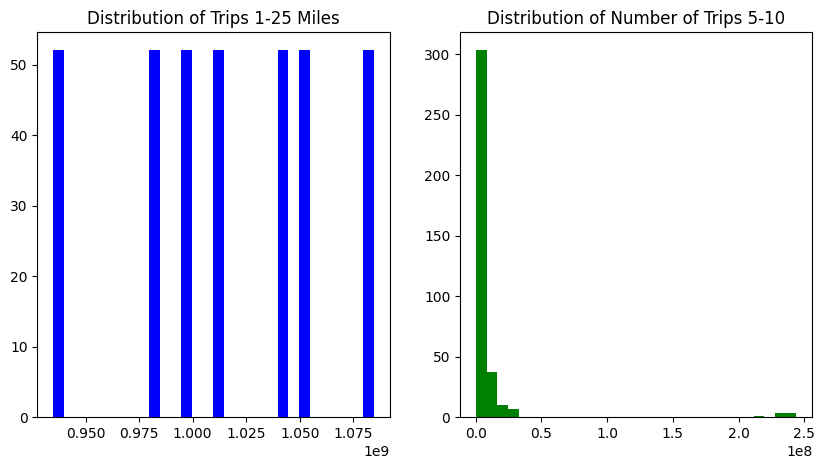

In [11]:
import matplotlib.pyplot as plt

# Plotting the distribution of Trips 1-25 Miles
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(aligned_data['Trips 1-25 Miles'], bins=30, color='blue')
plt.title('Distribution of Trips 1-25 Miles')

# Plotting the distribution of Number of Trips 5-10
plt.subplot(1, 2, 2)
plt.hist(aligned_data['Number of Trips 5-10'], bins=30, color='green')
plt.title('Distribution of Number of Trips 5-10')

plt.show()


In [12]:
import numpy as np

# Applying log transformation
X_log = np.log1p(X)  # log1p is used to handle zero values smoothly
y_log = np.log1p(y)

# Split data into training and testing sets for transformed data
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Create a linear regression model for transformed data
log_model = LinearRegression()

# Fit the model
log_model.fit(X_log_train, y_log_train)

# Predict using the model
y_log_pred = log_model.predict(X_log_test)

# Reverse the transformation for evaluation
y_test_true = np.expm1(y_log_test)
y_pred_true = np.expm1(y_log_pred)

# Evaluate the model
log_mse = mean_squared_error(y_test_true, y_pred_true)
log_r2 = r2_score(y_test_true, y_pred_true)

print(f'Intercept: {log_model.intercept_}')
print(f'Coefficients: {log_model.coef_}')
print(f'Mean Squared Error: {log_mse}')
print(f'R-squared: {log_r2}')


Intercept: -7.58977449546599
Coefficients: [1.0819005]
Mean Squared Error: 650323019242556.4
R-squared: -0.04312184133931818


In [13]:
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict using the model
y_rf_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print(f'Mean Squared Error: {rf_mse}')
print(f'R-squared: {rf_r2}')


Mean Squared Error: 662476717595612.1
R-squared: -0.06261644299110891


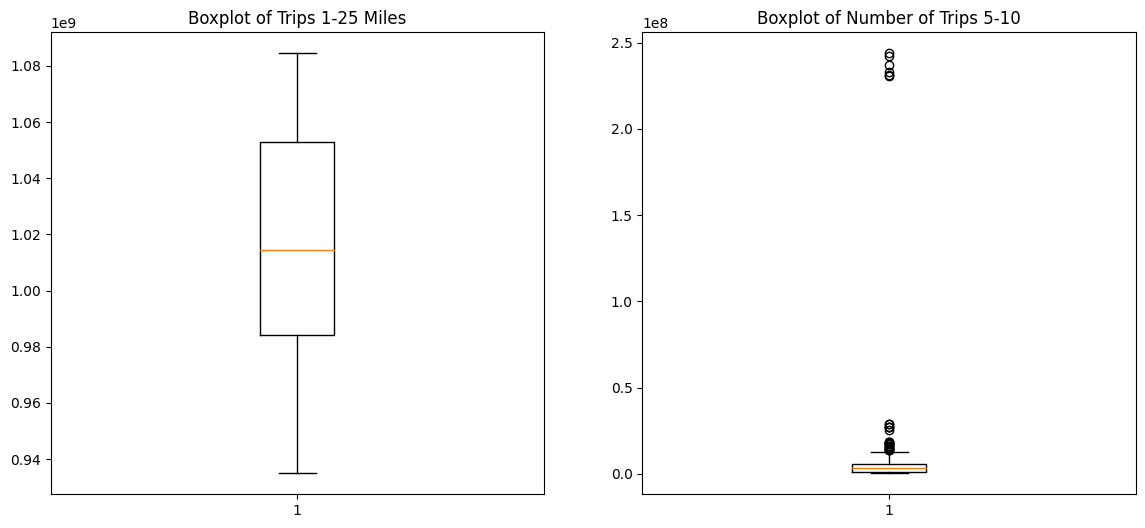

Missing values in each column:
Month of Date                       0
Week of Date                        0
Year of Date                        0
Level_x                             0
Date                                0
Week Ending Date                    0
Trips <1 Mile                       0
People Not Staying at Home          0
Population Staying at Home_x        0
Trips                               0
Trips 1-25 Miles                    0
Trips 1-3 Miles                     0
Trips 10-25 Miles                   0
Trips 100-250 Miles                 0
Trips 100+ Miles                    0
Trips 25-100 Miles                  0
Trips 25-50 Miles                   0
Trips 250-500 Miles                 0
Trips 3-5 Miles                     0
Trips 5-10 Miles                    0
Trips 50-100 Miles                  0
Trips 500+ Miles                    0
Level_y                             0
State FIPS                          7
State Postal Code                   7
County FIPS        

In [14]:
# 1. Identify Outliers
# Plotting boxplots to identify outliers
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.boxplot(X_train)
plt.title('Boxplot of Trips 1-25 Miles')

plt.subplot(1, 2, 2)
plt.boxplot(y_train)
plt.title('Boxplot of Number of Trips 5-10')

plt.show()

# 2. Check for Missing Values
# Assuming 'aligned_data' is the merged dataset we have been working with
print("Missing values in each column:")
print(aligned_data.isnull().sum())

# 3. Feature Importance Analysis
# Using the Random Forest Regressor to find feature importances
feature_importances = rf_model.feature_importances_
print(f"Feature importances: {feature_importances}")


In [15]:
# Calculate IQR
Q1 = aligned_data['Number of Trips 5-10'].quantile(0.25)
Q3 = aligned_data['Number of Trips 5-10'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
aligned_data_no_outliers = aligned_data[(aligned_data['Number of Trips 5-10'] >= lower_bound) &
                                        (aligned_data['Number of Trips 5-10'] <= upper_bound)]




In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the cleaned data
X_clean = aligned_data_no_outliers['Trips 1-25 Miles'].values.reshape(-1, 1)
y_clean = aligned_data_no_outliers['Number of Trips 5-10'].values

# Split the cleaned data into training and testing sets
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42)

# Create the Random Forest Regressor model
rf_model_clean = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on cleaned data
rf_model_clean.fit(X_train_clean, y_train_clean)

# Predict using the model
y_rf_pred_clean = rf_model_clean.predict(X_test_clean)

# Evaluate the model using cleaned data
rf_mse_clean = mean_squared_error(y_test_clean, y_rf_pred_clean)
rf_r2_clean = r2_score(y_test_clean, y_rf_pred_clean)

print(f'Mean Squared Error: {rf_mse_clean}')
print(f'R-squared: {rf_r2_clean}')


Mean Squared Error: 8964121072744.389
R-squared: -0.03257939227875206


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 4, 6]
}

# Create a base model
rf = RandomForestRegressor(random_state=42)

# Setup the cross-validation fold method. Let's use Repeated K-Folds
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the grid search to the cleaned data
grid_search.fit(X_clean, y_clean)

# Print the best parameters and the best score (negative MSE)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score (negative MSE): {grid_search.best_score_}")

# Calculate R-squared on the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_clean)
r2 = r2_score(y_clean, y_pred)

print(f"R-squared for the best model: {r2}")


Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best score (negative MSE): -7474738207836.533
R-squared for the best model: 0.0007412791228629256


In [18]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the model
gbm_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the cleaned data
gbm_model.fit(X_train_clean, y_train_clean)

# Predict using the model
y_gbm_pred_clean = gbm_model.predict(X_test_clean)

# Evaluate the model using the cleaned data
gbm_mse_clean = mean_squared_error(y_test_clean, y_gbm_pred_clean)
gbm_r2_clean = r2_score(y_test_clean, y_gbm_pred_clean)

print(f'GBM Mean Squared Error: {gbm_mse_clean}')
print(f'GBM R-squared: {gbm_r2_clean}')


GBM Mean Squared Error: 8950953923413.51
GBM R-squared: -0.03106266498961907


In [19]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial and interaction features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_clean)

# Split the new feature set into training and testing sets
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(
    X_poly, y_clean, test_size=0.2, random_state=42)

# Fit the Random Forest on this new feature set
rf_poly_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_poly_model.fit(X_poly_train, y_poly_train)

# Evaluate the new model
y_poly_pred = rf_poly_model.predict(X_poly_test)
poly_mse = mean_squared_error(y_poly_test, y_poly_pred)
poly_r2 = r2_score(y_poly_test, y_poly_pred)

print(f'Polynomial Features MSE: {poly_mse}')
print(f'Polynomial Features R-squared: {poly_r2}')


Polynomial Features MSE: 8964121072744.389
Polynomial Features R-squared: -0.03257939227875206


In [20]:
# Convert the regression problem into a classification one
# Create a binary target variable indicating above (1) or below (0) average trips
y_binary = (y_clean > y_clean.mean()).astype(int)

# Split the binary dataset
X_binary_train, X_binary_test, y_binary_train, y_binary_test = train_test_split(
    X_clean, y_binary, test_size=0.2, random_state=42)

# Fit a classification model, for example, a Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_binary_train, y_binary_train)

# Predict using the classifier
y_binary_pred = rf_classifier.predict(X_binary_test)

# Evaluate the classifier
from sklearn.metrics import accuracy_score
binary_accuracy = accuracy_score(y_binary_test, y_binary_pred)

print(f'Binary Classification Accuracy: {binary_accuracy}')


Binary Classification Accuracy: 0.5909090909090909


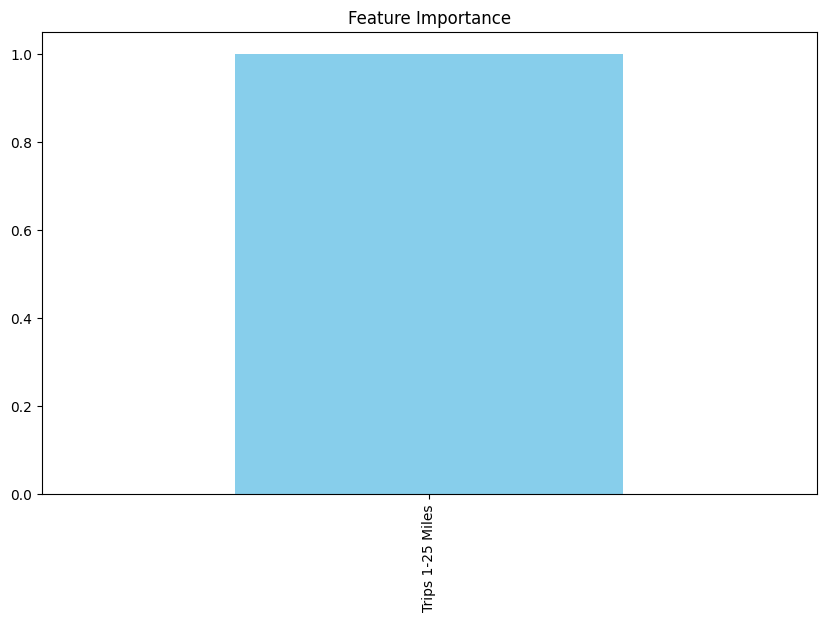

In [23]:
# Assuming X_clean is used directly in the classifier without transformation
importances = rf_classifier.feature_importances_
feature_names = ['Trips 1-25 Miles']  # Update this to reflect the actual features used in your model

# Create the Series object for plotting
f_importances = pd.Series(importances, index=feature_names)

# Plot the feature importances
plt.figure(figsize=(10, 6))
f_importances.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Importance')
plt.show()

